In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

----
****
## Dataset Description
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of *blacks* by town
13. LSTAT: lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's
----
****

In [6]:
boston=load_boston()

In [7]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [8]:
X=boston.data
Y=boston.target

In [9]:
df=pd.DataFrame(X,columns=boston.feature_names)

In [10]:
df1=df.copy()
df1['y']=Y

In [11]:
reg_all=linear_model.LinearRegression()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [20]:
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
y_pred=reg_all.predict(X_test)

In [16]:
reg_all.score(X_test,y_test)

0.71468959892943218

In [44]:
ridge=linear_model.Ridge(alpha=0.01,normalize=True)

In [50]:
lasso=linear_model.Lasso(alpha=0.01,normalize=True)

In [45]:
cv_results=cross_val_score(ridge, X, Y, cv=10)

In [32]:
print(cv_results)

[ 0.77805131  0.57882365 -0.29857061  0.59318516  0.58326536  0.71243043
  0.4461999  -0.00374278 -0.6357922   0.52858366]


In [46]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [47]:
ridge.score(X_test,y_test)

0.71230267127513669

In [51]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
lasso.score(X_test,y_test)

0.69009109327044349

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80827cd630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f80821e9c50>]], dtype=object)

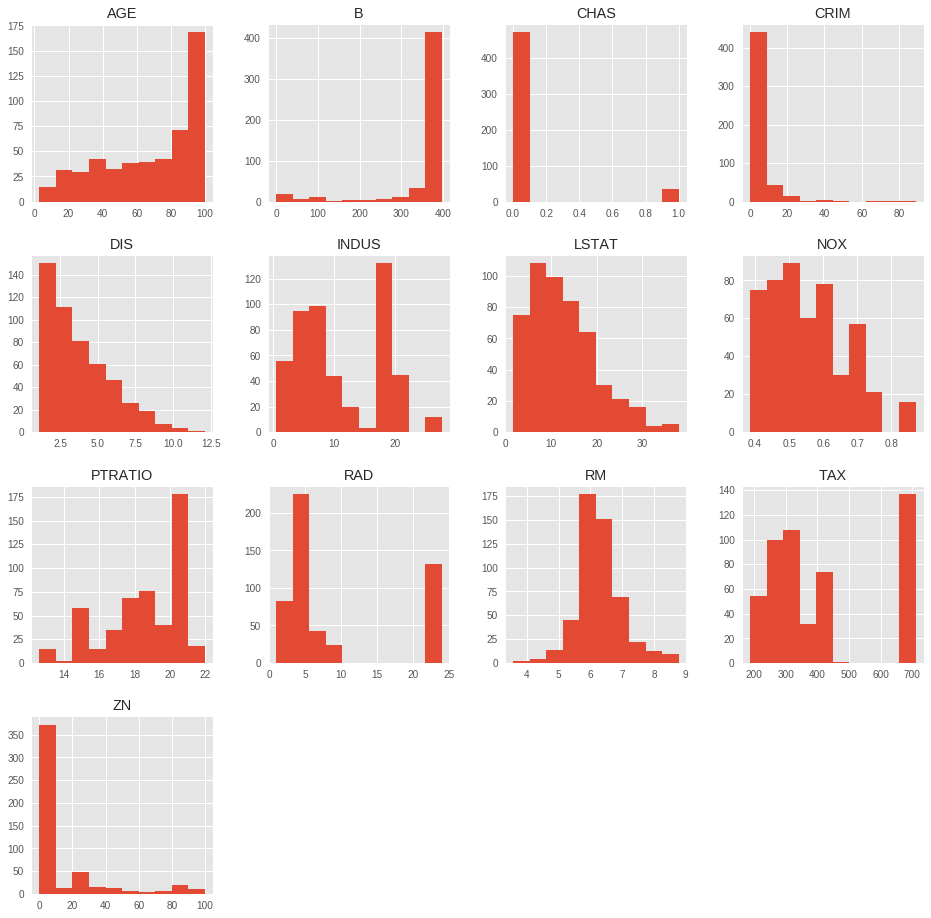

In [53]:
pd.DataFrame.hist(df,figsize=[16,16])

In [13]:
import seaborn as sns
df2=df1.ix[:,6:].copy()

In [14]:
df2.head()

,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


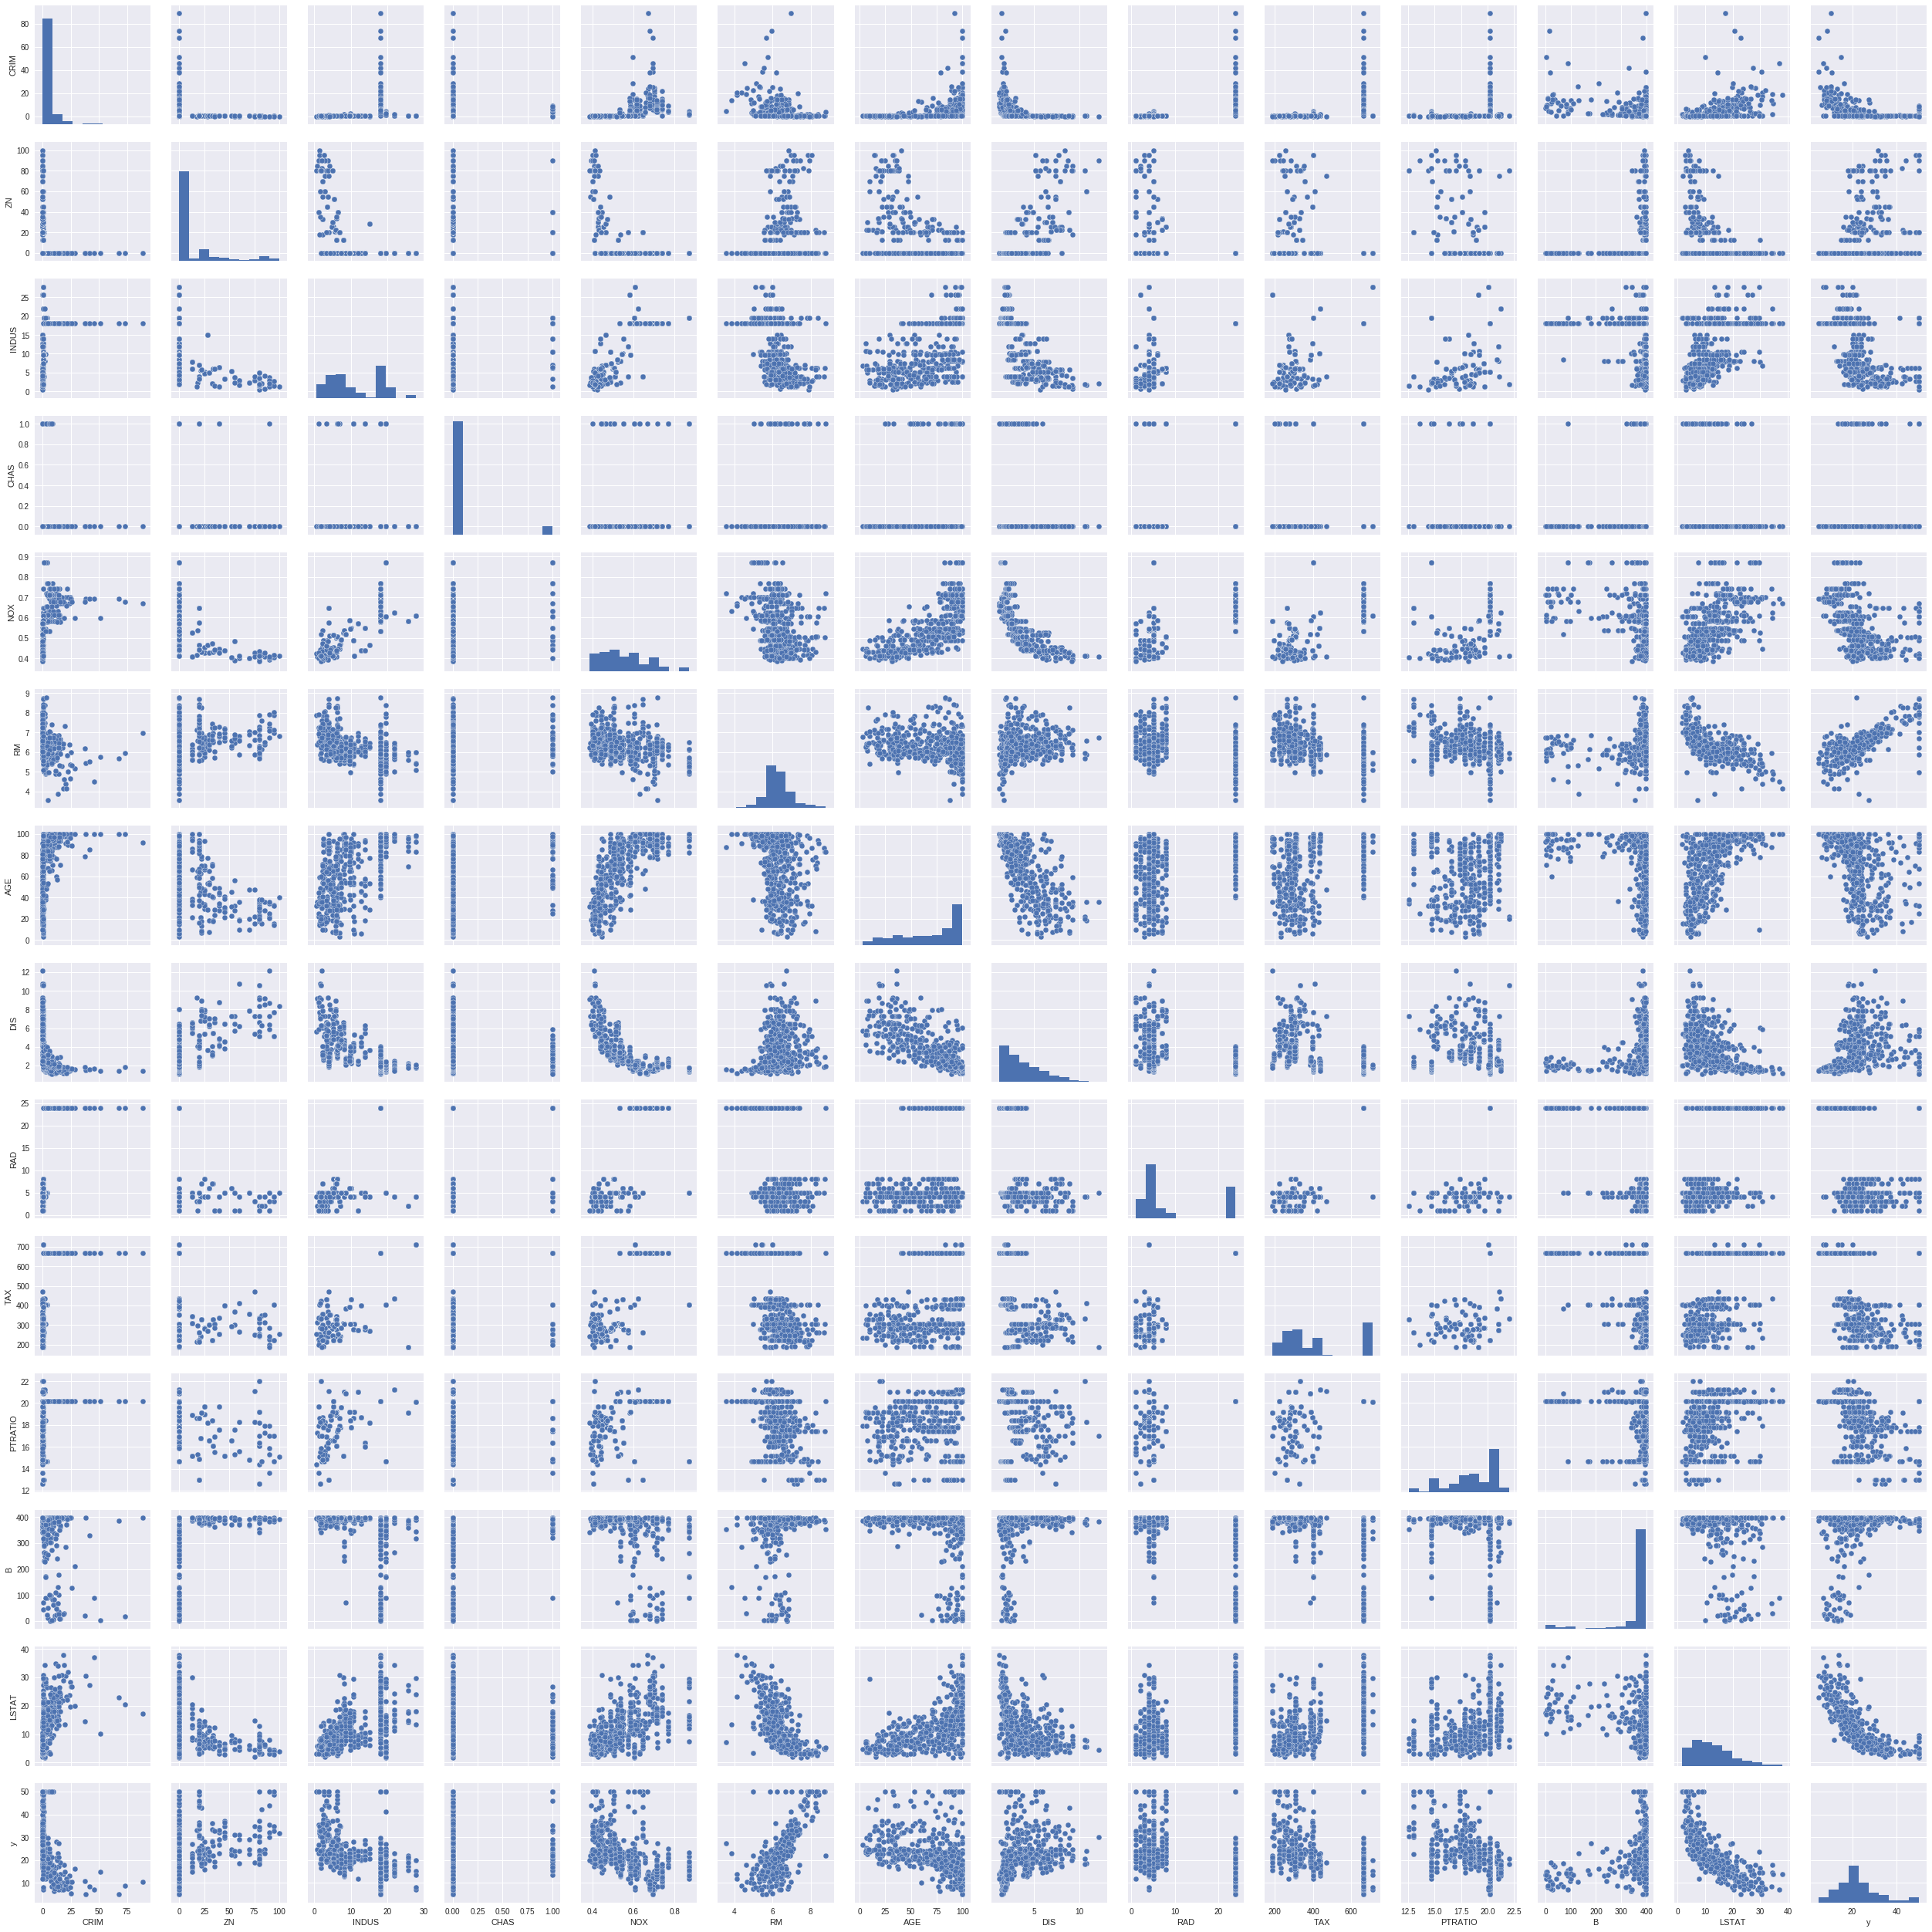

In [23]:
sns.pairplot(df1)

In [15]:
np.absolute(df1.corr(method='pearson'))>0.7

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,True,False,True,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,True,False,True,True,False,False,False,False,False,False
DIS,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [16]:
np.absolute(df1.corr(method='pearson'))>0.7

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,True,False,False,True,False,True,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False,False
NOX,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False,False
AGE,False,False,False,False,True,False,True,True,False,False,False,False,False,False
DIS,False,False,True,False,True,False,True,True,False,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False,False
TAX,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [17]:
df1.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


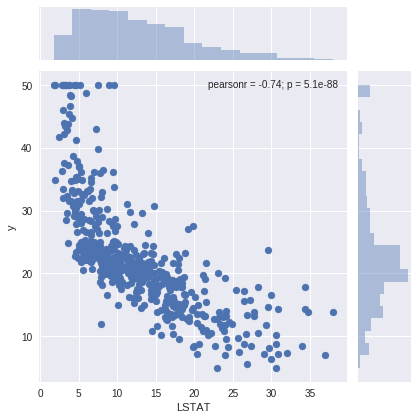

In [18]:
sns.jointplot(x='LSTAT',y='y',data=df2)

_y_ and _LSTAT_ have a negative correlation of 0.71, indicating that a **higher house price** corresponds to **lesser population of lower status**, which seems to be reasonable.

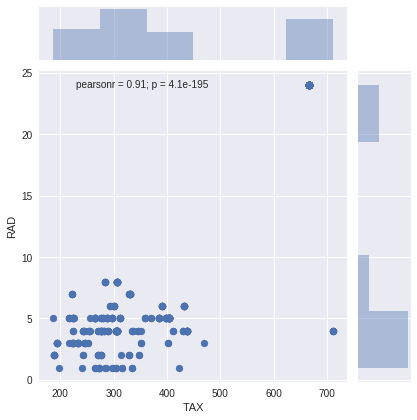

In [22]:
sns.jointplot(x='TAX',y='RAD',data=df2)

*TAX* and *RAD* have a strong positive correlation of 0.91. This signifies that houses with high property taxes have better access to highways. This is because higher property tax corresponds to a posh location, and hence a better access to roadways.

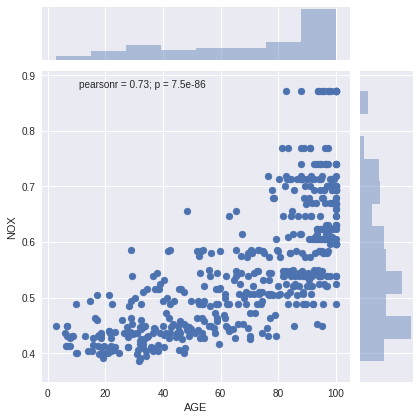

In [16]:
sns.jointplot(x='AGE',y='NOX',data=df1)

*AGE* and *NOX* have a positive correlation of 0.73, which signifies that older houses emit higher amounts of nitric oxide. This indicates that generally older houses use higher amounts of fossil fuels, while the newer ones may have shifted to cleaner sources of energy.

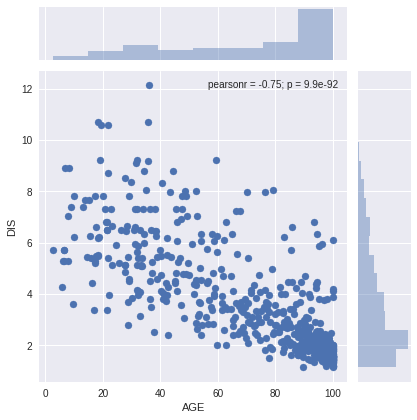

In [15]:
sns.jointplot(x='AGE',y='DIS',data=df1)

*DIS* and *AGE* have a negative correlation of 0.75, referring to larger distances to employment centres of the new houses.

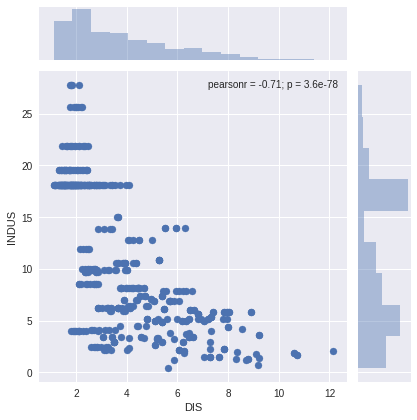

In [22]:
sns.jointplot(y='INDUS',x='DIS',data=df1)

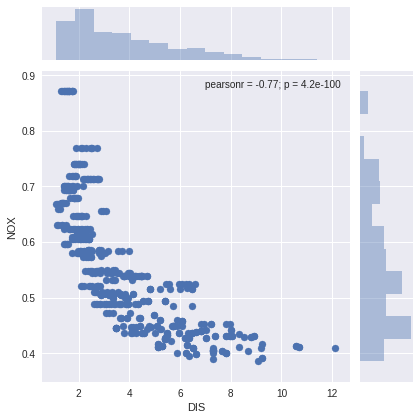

In [19]:
sns.jointplot(y='NOX',x='DIS',data=df1)

*NOX* and *DIS* have a negative correlation of 0.77. This may be beacuse of the aforementioned correlation between *NOX* and *AGE*, and *AGE* and *DIS*.

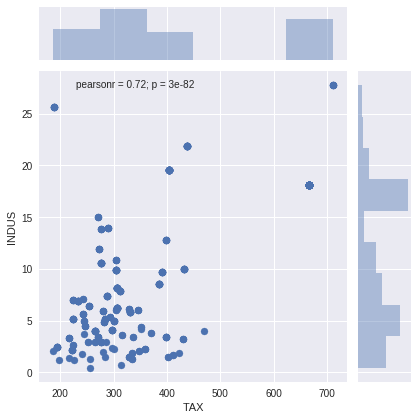

In [24]:
sns.jointplot(x='TAX',y='INDUS',data=df1)

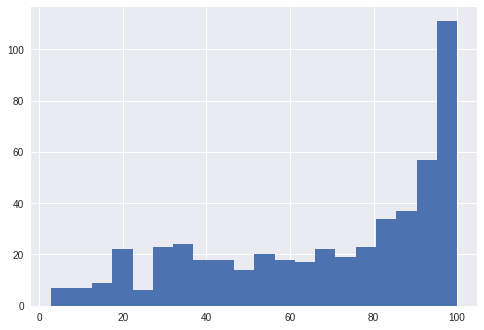

In [20]:
df1['AGE'].hist(bins=20)

The histogram has a high peak for 95-100, indicating a large no. of houses built prior to 1940 in Botson.

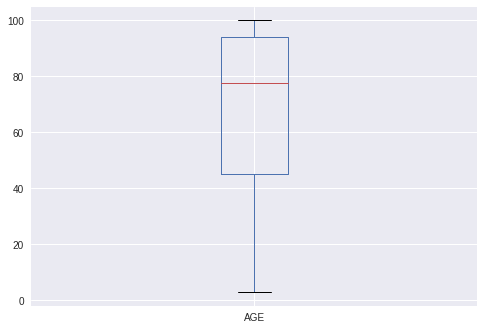

In [36]:
df['AGE'].plot.box()

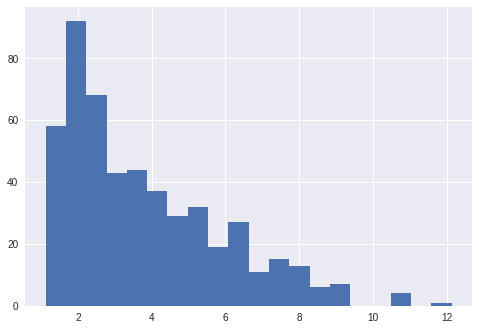

In [37]:
df1['DIS'].hist(bins=20)

This histogram indicates more no. of houses at locations closer to the employment centre. This can be also inferred from the high negative correlation between *AGE* and *DIS*, and the large no. of old houses present in Boston, indicated by the *AGE* histogram.

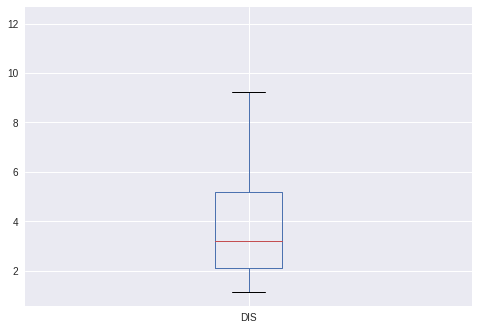

In [37]:
df['DIS'].plot.box()

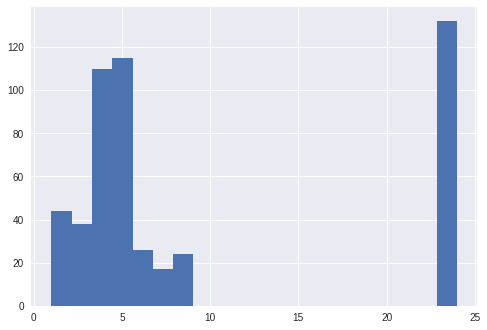

In [22]:
df1['RAD'].hist(bins=20)

A large number of are in the range 1 to 9, except 132 which have a value of 24. These 132 houses have the same, disjoint index value of highway accessibility, which may be because of all these houses being at the same location.

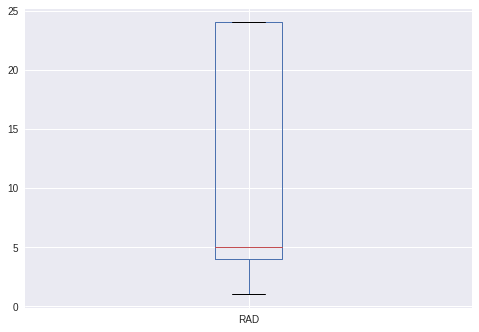

In [38]:
df['RAD'].plot.box()

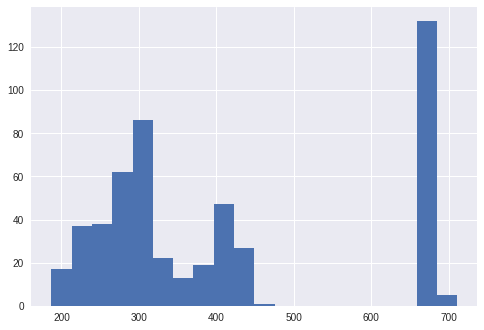

In [30]:
df1['TAX'].hist(bins=20)

A trend similar to *RAD* can be seen. This may be because of the high correlation between *TAX* and *RAD*

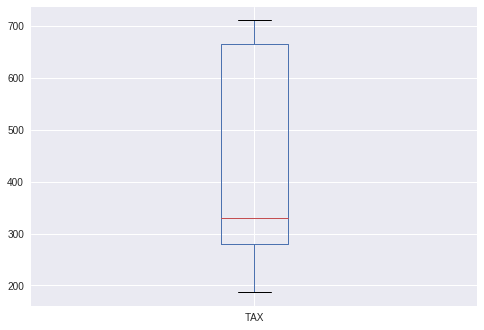

In [39]:
df['TAX'].plot.box()

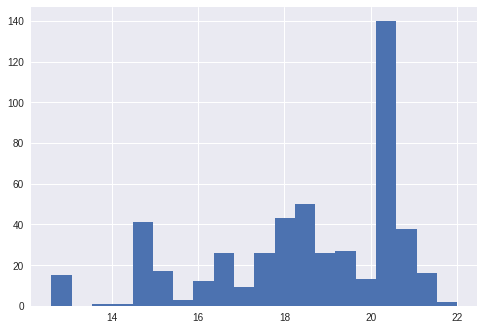

In [31]:
df1['PTRATIO'].hist(bins=20)

This histogram indicates that most towns have a high pupil teacher ratio

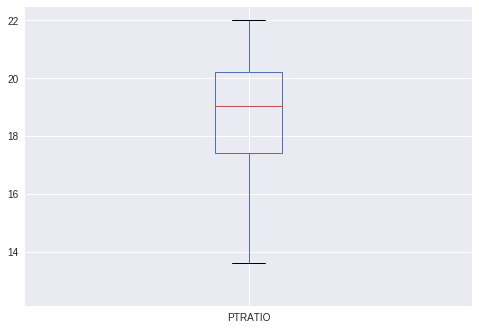

In [40]:
df['PTRATIO'].plot.box()

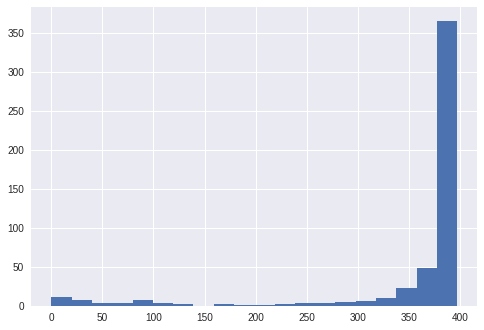

In [32]:
df1['B'].hist(bins=20)

The histogram indicates presence of a large amount of blacks in most towns

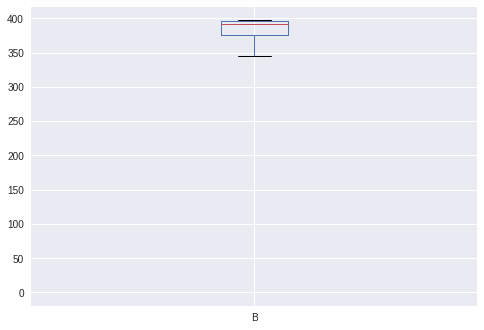

In [41]:
df['B'].plot.box()

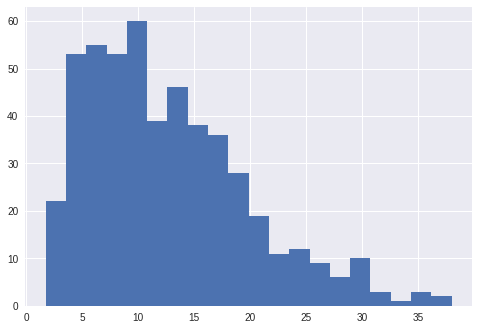

In [33]:
df1['LSTAT'].hist(bins=20)

The graph is densely populated on the left hand side, indicating more population of the lower status

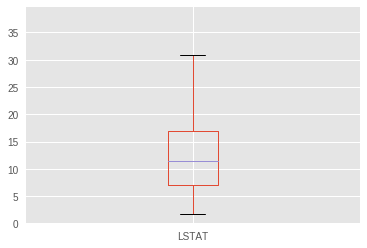

In [50]:
df['LSTAT'].plot.box()

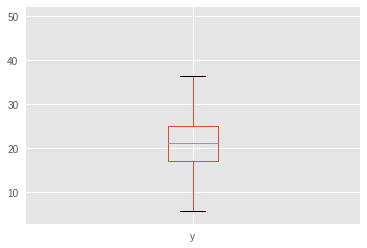

In [51]:
df1['y'].plot.box()

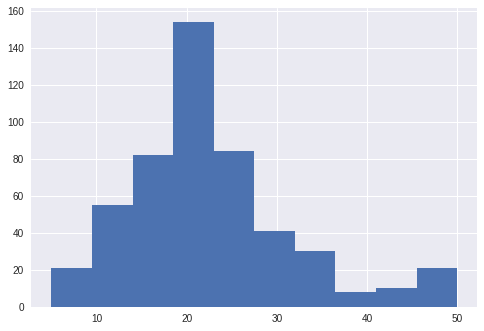

In [42]:
df1['y'].hist(bins=10)

Distribution of house prices.

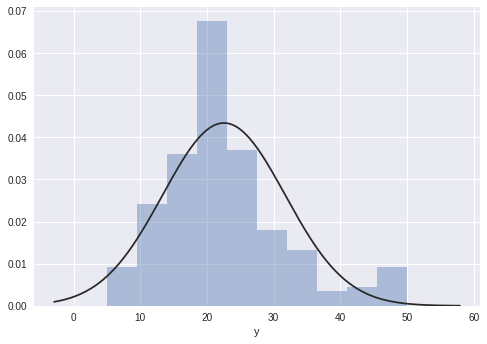

In [41]:
from scipy.stats import norm
sns.distplot(df1['y'],bins=10,fit=norm,kde=False)